['ECG1', 'ECG2']
   ECG1  ECG2      time
0  0.16 -0.29  0.000000
1  0.18 -0.30  0.007812
2  0.17 -0.32  0.015625
3  0.18 -0.29  0.023438
4  0.18 -0.31  0.031250


C:\Users\maiqu\Desktop\Killian\Research\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


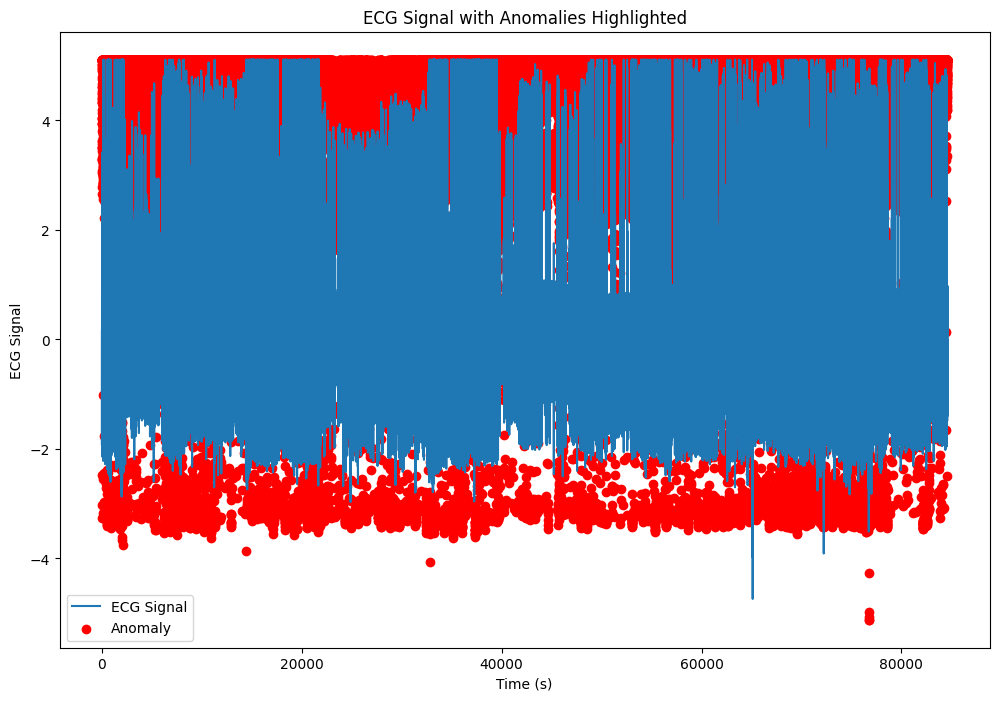

In [3]:
import wfdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the record and annotation
record = wfdb.rdrecord('C:\\Users\\maiqu\\Desktop\\Killian\\Research\\Datasets\\mit-bih-long-term-ecg-database-1.0.0\\14046')
annotation = wfdb.rdann('C:\\Users\\maiqu\\Desktop\\Killian\\Research\\Datasets\\mit-bih-long-term-ecg-database-1.0.0\\14046', 'atr')

print(record.sig_name)

# Convert the signal to a DataFrame
df = pd.DataFrame(record.p_signal, columns=record.sig_name)

# Add the time column
df['time'] = np.arange(len(df)) / record.fs

# Display the first few rows of the DataFrame
print(df.head())

# Define the window size (e.g., 5 seconds) (record.fs: the number of samples taken per second, 5 is the duration of the window in seconds => window size will have 5 * record.fs samples => 5 seconds will contain 1800 samples of ECG signal)
window_size = 5 * record.fs  # window_size: the number of data points in each window

# Create sliding windows
windows = df.rolling(window=window_size)

# Plot the data
plt.figure(figsize=(12, 8))

# Plot the ECG signal
plt.plot(df['time'], df['ECG1'], label='ECG Signal')

# Highlight anomalies
anomaly_times = annotation.sample / record.fs
plt.scatter(anomaly_times, df.loc[annotation.sample, 'ECG2'], color='red', label='Anomaly')

# Add labels and legend
plt.xlabel('Time (s)')
plt.ylabel('ECG Signal')
plt.title('ECG Signal with Anomalies Highlighted')
plt.legend()

# Show the plot
plt.show()